- create gridworld 3x4
- use grid (2,3) as goal state with reward 1
- use grid (1,1) as bad state with reward -1
- create a learning agent that uses SARSA to learn the optimal policy
- train for 1000 episodes
- plot q-values for each state-action pair

- learning rate = 0.7
- discount factor = 0.4
- epsilon = 0.25
- uniform distribution for initial q-values in [0, 0.01]

![grid](image.png)

In [8]:
import numpy as np

class GridWorld:
    def __init__(self, x, y):
        self.x = x # number of rows = 3
        self.y = y # number of columns = 4

        # create 1D reward array
        self.R = np.zeros(self.x*self.y)

        # starting position of agent
        self.agentPos = 0

    def idx2xy(self, idx):
        '''
        Convert index to x, y coordinates
        For example, 0 -> (0, 0)
        5 -> (1,1)
        11 -> (2, 3)
        
        if index = 1, x = 1/4 = 0, y = 1%4 = 1
        if index = 5, x = 5/4 = 1, y = 5%4 = 1
        if index = 11, x = 11/4 = 2, y = 11%4 = 3
        '''
        x = int(idx/self.y)
        y = idx % self.y
        return x, y
    
    def xy2idx(self, x, y):
        '''
        Convert x, y coordinates to index
        For example, (0, 0) -> 0
        (1, 1) -> 5
        (2, 3) -> 11
        if x = 0, y = 0, index = 0*4 + 0 = 0
        if x = 1, y = 1, index = 1*4 + 1 = 5
        if x = 2, y = 3, index = 2*4 + 3 = 11
        '''
        return x*self.y + y
    
    def showR(self):
        '''
        Show reward array in 2D
        '''
        # use reshape to convert 1D array to 2D array
        # reshape(3, 4) means 3 rows and 4 columns
        print(self.R.reshape(self.x, self.y))

    def setReward(self, x, y, reward):
        '''
        Set reward for a grid
        if x = 2, y = 3, reward = 1
        index = 2*4 + 3 = 11
        R[11] = 1
        '''
        idx = self.xy2idx(x, y)
        self.R[idx] = reward

# TODO 1: create a 3x4 grid world
# create class GridWorld and showR method
world = GridWorld(3, 4)
print(world.R) # show reward array in 1D np.zeros(12)
world.showR() # show reward array in 2D np.zeros(3, 4)

# TODO 2: set reward
# create set reward method, xy2idx method
# set reward 1 for grid (2, 3)
# world.setReward(0, 0, 10000)
world.setReward(2, 3, 1)

# set rewrard -1 for grid (1, 1)
world.setReward(1, 1, -1)
world.showR()






[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[ 0.  0.  0.  0.]
 [ 0. -1.  0.  0.]
 [ 0.  0.  0.  1.]]


In [18]:
import numpy as np

class World:

    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.R = np.zeros((width, height))
        self.agent_pos = (0, 0)

    def reset_agent(self, pos):
        self.agent_pos = pos

    def set_reward(self, x, y, reward):
        self.R[x, y] = reward

    def get_state(self):
        return self.agent_pos

    def get_reward(self):
        x, y = self.agent_pos
        return self.R[x, y]

    def get_num_states(self):
        return self.width * self.height

    def get_num_actions(self):
        return 4

    def move(self, action_id):
        x, y = self.agent_pos
        if action_id == 0: x += 1      # DOWN
        elif action_id == 1: x -= 1    # UP
        elif action_id == 2: y += 1    # RIGHT
        elif action_id == 3: y -= 1    # LEFT
        else: raise ValueError("Unknown action")

        if self.valid_move(x, y):
            self.agent_pos = (x, y)

    def valid_move(self, x, y):
        return 0 <= x < self.width and 0 <= y < self.height




In [19]:
world = World(3, 4)

world.set_reward(2,3,1)
world.set_reward(1,1,-1)

In [ ]:
# Test actions
world.reset_agent((0, 0))
actions = [0, 0, 2, 1]  # Move DOWN, DOWN, RIGHT, UP (to position 5)

for action in actions:
    world.move(action)
    print("Agent Position:", world.get_state())
    print("Reward at Position:", world.get_reward())

In [20]:
import matplotlib.pyplot as plt

class Agent:

    def __init__(self, world):
        self.world = world
        self.num_of_actions = self.world.get_num_actions()
        self.num_of_states = self.world.get_num_states()
        self.Q = np.random.uniform(0.0, 0.01, (self.world.width, self.world.height, self.num_of_actions))
        self.alpha = 0.7
        self.gamma = 0.4
        self.epsilon = 0.25

    # epsilon-greedy action selection
    def action_selection(self, state):
        if np.random.rand() <= self.epsilon:
            action = np.random.randint(self.num_of_actions)
        else:
            x, y = state
            action = np.argmax(self.Q[x, y, :])
        return action

    def train(self, iterations):
        for itr in range(iterations):
            state = (np.random.randint(self.world.width), np.random.randint(self.world.height))
            self.world.reset_agent(state)
            episode = True

            while episode:
                x, y = state
                action = self.action_selection(state)
                self.world.move(action)
                reward = self.world.get_reward()
                new_state = self.world.get_state()
                new_x, new_y = new_state
                new_action = self.action_selection(new_state)

                # update Q-values
                self.Q[x, y, action] += self.alpha * (reward + self.gamma * self.Q[new_x, new_y, new_action] - self.Q[x, y, action])

                state = new_state

                if reward == 1.0:
                    self.Q[new_x, new_y, :] = 0
                    episode = False

        print(self.Q)

    def plot_q_values(self):
        plt.rcParams.update({'font.size': 18})
        plt.imshow(self.Q, cmap='Oranges', interpolation='nearest', aspect='auto')
        plt.colorbar()
        plt.title("Q-values")
        plt.xlabel("Actions")
        plt.ylabel("States")
        plt.xticks(np.arange(4), ('Down', 'Up', 'Right', 'Left'))
        plt.yticks(np.arange(self.num_of_states), np.arange(self.num_of_states))
        plt.show()


    # def plot_q_values(self):
    #     plt.rcParams.update({'font.size': 18})
    #     fig, ax = plt.subplots(self.num_of_actions, 1, figsize=(10, 20))
    #     for action in range(self.num_of_actions):
    #         ax[action].imshow(self.Q[:, :, action], cmap='Oranges', interpolation='nearest', aspect='auto')
    #         ax[action].set_title(f"Q-values for action {['Down', 'Up', 'Right', 'Left'][action]}")
    #         ax[action].set_xlabel("Y")
    #         ax[action].set_ylabel("X")
    #         ax[action].set_xticks(np.arange(self.world.height))
    #         ax[action].set_yticks(np.arange(self.world.width))
    #     plt.tight_layout()
    #     plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9610062493500575..1.0].


[[[-8.13681966e-03 -7.56761617e-02 -4.56749079e-03 -2.14419158e-02]
  [-9.54080065e-01 -8.06708475e-03 -1.67644965e-02  4.36672034e-04]
  [-2.31501101e-01 -1.54335296e-03  2.84165758e-02  4.28197835e-03]
  [ 3.35492281e-01  6.46364272e-02  1.07098289e-01  3.06887479e-02]]

 [[-5.78052862e-02 -3.80819473e-04 -9.40702383e-01 -2.64131685e-01]
  [ 8.33030730e-02 -3.74647696e-03  1.51063291e-01  4.55585499e-03]
  [ 9.04030643e-02 -4.93147576e-02  3.99814325e-01 -9.51194541e-01]
  [ 1.00000000e+00  1.04706211e-01  3.20947743e-01  6.48399744e-02]]

 [[-1.13495353e-02 -8.93315384e-02  3.42540329e-02 -3.73501084e-03]
  [ 1.13569386e-01 -9.61006249e-01  3.26591247e-01  5.43228565e-02]
  [ 5.05279186e-02 -2.29415076e-01  1.00000000e+00  1.28442142e-01]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]]


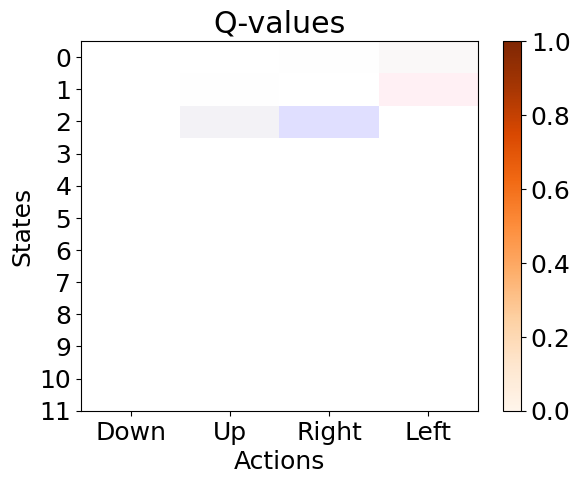

In [21]:
agent = Agent(world)
agent.train(1000)
agent.plot_q_values()

In [22]:
import numpy as np
import matplotlib.pyplot as plt

class World(object):

    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.R = np.zeros(self.x*self.y)
        self.agentPos = 0

    def idx2xy(self,idx):
        x = int(idx / self.y)
        y = idx % self.y
        return x, y

    def xy2idx(self,x,y):
        return x*self.y + y

    def resetAgent(self, pos):
        self.agentPos = int(pos)

    def setReward(self, x, y, r):
        goalState = self.xy2idx(x, y)
        self.R[goalState] = r

    def getState(self):
        return self.agentPos

    def getReward(self):
        if self.agentPos == -1:
            return -1.0
        else:
            return self.R[self.agentPos]

    def getNumOfStates(self):
        return self.x*self.y

    def getNumOfActions(self):
        return 4

    def move(self,id):
        x_, y_ = self.idx2xy(self.agentPos)
        tmpX = x_
        tmpY = y_
        if id == 0: # move DOWN
            tmpX += 1
        elif id == 1: # move UP
            tmpX -= 1
        elif id == 2: # move RIGHT
            tmpY += 1
        elif id == 3: # move LEFT
            tmpY -= 1
        else:
            print("ERROR: Unknown action")

        if self.validMove(tmpX, tmpY):
            self.agentPos = self.xy2idx(tmpX,tmpY)

    def validMove(self,x,y):
        valid = True
        if x < 0 or x >= self.x:
            valid = False
        if y < 0 or y >= self.y:
            valid = False
        return valid


In [23]:
class Agent(object):
    def __init__(self, world):
        self.world = world
        self.numOfActions = self.world.getNumOfActions()
        self.numOfStates = self.world.getNumOfStates()
        self.Q = np.random.uniform(0.0,0.01,(self.numOfStates,self.numOfActions))
        self.alpha = 0.7
        self.gamma = 0.4
        self.epsilon = 0.25

    # epsilon-greedy action selection
    def actionSelection(self, state):
        if (np.random.rand() <= self.epsilon):
            action = np.random.randint(self.numOfActions)
        else:
            action = np.argmax(self.Q[state,:])

        return action

    def train(self, iter):
        for itr in range(iter):

            state = int(np.random.randint(0,self.numOfStates))
            self.world.resetAgent(state)

            # choose action
            a = self.actionSelection(state)
            expisode = True

            while expisode:
                # perform action
                self.world.move(a)
                # look for reward
                reward = self.world.getReward()
                state_new = int(self.world.getState())

                # new action
                a_new = self.actionSelection(state_new)

                # update Q-values
                self.Q[state,a] += self.alpha*(reward +
                                    self.gamma*self.Q[state_new,a_new]-
                                    self.Q[state,a])

                state = state_new
                a = a_new

                if reward == 1.0:
                    self.Q[state_new,:] = 0
                    expisode = False

        print(self.Q)

    def plotQValues(self):
        plt.rcParams.update({'font.size': 18})
        plt.imshow(self.Q, cmap='Oranges', interpolation='nearest', aspect='auto')
        plt.colorbar()
        plt.title("Q-values")
        plt.xlabel("Actions")
        plt.ylabel("States")
        plt.xticks(np.arange(4), ('Down', 'Up', 'Right', 'Left'))
        plt.yticks(np.arange(self.numOfStates), np.arange(self.numOfStates))
        plt.show()


[[-0.00135373 -0.00996744  0.00409459 -0.02716047]
 [-0.97278671  0.0020764   0.04858617 -0.00242489]
 [-0.23158066 -0.00303491  0.1565391   0.00541238]
 [ 0.39986874  0.13733155  0.1522545   0.01854798]
 [-0.09007026 -0.00888634 -0.95230942 -0.27184087]
 [-0.05150989  0.01201239 -0.22901464 -0.0069758 ]
 [-0.00331286  0.04061638  0.30277837 -0.98418372]
 [ 1.          0.05853813  0.39993623  0.02828653]
 [-0.06416204 -0.12223394  0.14466279 -0.06623971]
 [ 0.12606076 -0.99118118  0.39908606  0.04442793]
 [ 0.42248403 -0.29965152  1.00005715 -0.24058241]
 [ 0.          0.          0.          0.        ]]


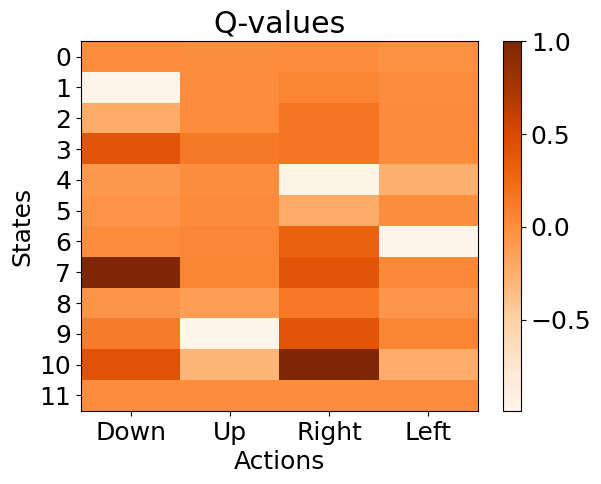

In [24]:
#Section 3.a.
world = World(3,4)

#Section 3.b.
world.setReward(2, 3, 1.0) #Goal state
world.setReward(1, 1, -1.0) #Fear region

#Section 3.c.
learner = Agent(world)

#Section 3.d.
learner.train(1000)

#Section 3.e.
learner.plotQValues()

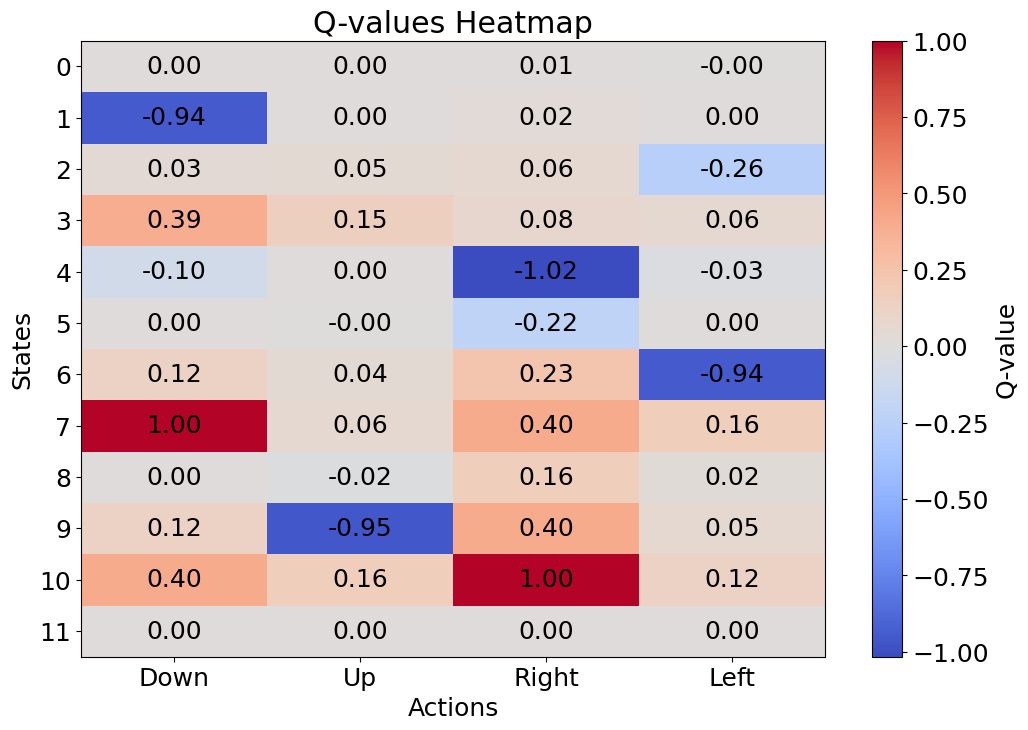

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Simplified Q-table for a 3x4 grid with 4 actions
# Example Q-values for illustration purposes
Q = np.array([
    [ 1.21338252e-03,  1.60730512e-03,  7.31243533e-03, -4.75969196e-03],
    [-9.40245153e-01,  1.35827162e-03,  2.42519046e-02,  1.20442917e-03],
    [ 3.24430318e-02,  4.55298947e-02,  6.04716602e-02, -2.63408665e-01],
    [ 3.92876518e-01,  1.47252442e-01,  7.68873842e-02,  6.03891493e-02],
    [-9.54908078e-02,  2.20206189e-03, -1.01617445e+00, -2.67377376e-02],
    [ 2.46453567e-03, -6.16894762e-04, -2.15018783e-01,  9.52336632e-04],
    [ 1.24272729e-01,  4.31206083e-02,  2.31999872e-01, -9.38823138e-01],
    [ 1.00000000e+00,  5.77410961e-02,  4.00000000e-01,  1.57783372e-01],
    [ 3.24859828e-03, -2.26139097e-02,  1.59878000e-01,  1.95465198e-02],
    [ 1.22367309e-01, -9.53612525e-01,  3.99999962e-01,  5.22370955e-02],
    [ 3.99821352e-01,  1.59747808e-01,  1.00000000e+00,  1.21490221e-01],
    [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00]
])

# Plotting the simplified Q-table
def plot_q_values(Q):
    num_states, num_actions = Q.shape
    plt.figure(figsize=(12, 8))
    
    # Heatmap of Q-values
    plt.imshow(Q, cmap='coolwarm', interpolation='nearest', aspect='auto')
    plt.colorbar(label='Q-value')
    plt.title("Q-values Heatmap")
    plt.xlabel("Actions")
    plt.ylabel("States")
    
    # Setting action labels
    plt.xticks(np.arange(num_actions), ['Down', 'Up', 'Right', 'Left'])
    plt.yticks(np.arange(num_states), np.arange(num_states))
    
    # Annotating the heatmap with Q-values
    for i in range(num_states):
        for j in range(num_actions):
            plt.text(j, i, f"{Q[i, j]:.2f}", ha='center', va='center', color='black')
    
    plt.show()

# Plot the simplified Q-table
plot_q_values(Q)


When you are in state 7 you really should go down, and when in state 10 should really go right. :D

Example Analysis
Consider the following row from the Q-table: (State 1)

State Index: This corresponds to a specific state in the grid.

Action 0 (Move Down): Q-value is approximately -1.09. This suggests that moving down from this state is expected to lead to a low reward or potentially a negative outcome.

Action 1 (Move Up): Q-value is approximately -0.006. This is very close to zero, suggesting that moving up has a negligible effect on rewards.

Action 2 (Move Right): Q-value is approximately 0.086. This implies that moving right is somewhat beneficial and could lead to a positive reward.

Action 3 (Move Left): Q-value is approximately 0.004. This also suggests a slightly positive outcome but less significant compared to moving right.

Summary of the Q-table

High Values: A higher Q-value indicates a better expected reward for taking that action from that state. For example, the highest value in the table 1.66220602 represents a strong positive expectation for the corresponding action and state.

Negative Values: Negative Q-values indicate that taking that action from that state is expected to lead to a negative outcome. For example, -1.08689461 indicates a significant penalty.

[[ 1.21338252e-03  1.60730512e-03  7.31243533e-03 -4.75969196e-03]
 [-9.40245153e-01  1.35827162e-03  2.42519046e-02  1.20442917e-03]
 [ 3.24430318e-02  4.55298947e-02  6.04716602e-02 -2.63408665e-01]
 [ 3.92876518e-01  1.47252442e-01  7.68873842e-02  6.03891493e-02]
 [-9.54908078e-02  2.20206189e-03 -1.01617445e+00 -2.67377376e-02]
 [ 2.46453567e-03 -6.16894762e-04 -2.15018783e-01  9.52336632e-04]
 [ 1.24272729e-01  4.31206083e-02  2.31999872e-01 -9.38823138e-01]
 [ 1.00000000e+00  5.77410961e-02  4.00000000e-01  1.57783372e-01]
 [ 3.24859828e-03 -2.26139097e-02  1.59878000e-01  1.95465198e-02]
 [ 1.22367309e-01 -9.53612525e-01  3.99999962e-01  5.22370955e-02]
 [ 3.99821352e-01  1.59747808e-01  1.00000000e+00  1.21490221e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]


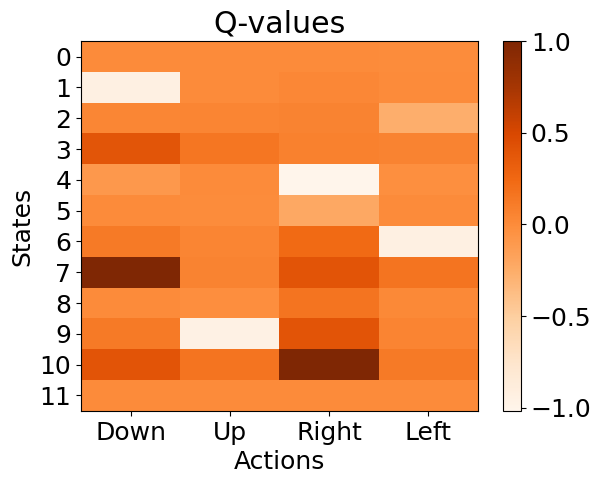

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# World class representing the grid environment
class World:

    def __init__(self, width, height):
        self.width = width  # Number of rows in the grid (e.g., 3)
        self.height = height  # Number of columns in the grid (e.g., 4)
        self.R = np.zeros((width, height))  # Reward matrix initialized to zeros for a 3x4 grid
        self.agent_pos = (0, 0)  # Initial position of the agent in (row, column) format

    # Convert 1D index to 2D coordinates (row, column)
    def idx2xy(self, idx):
        x = idx // self.height  # Row index
        y = idx % self.height  # Column index
        return x, y

    # Convert 2D coordinates (row, column) to 1D index
    def xy2idx(self, x, y):
        return x * self.height + y  # For a 3x4 grid, index = row * 4 + column

    # Reset agent position using 1D index
    def reset_agent(self, pos):
        self.agent_pos = self.idx2xy(pos)  # Convert 1D index to 2D coordinates and set agent position

    # Set reward at specific 2D coordinates (row, column)
    def set_reward(self, x, y, reward):
        self.R[x, y] = reward  # Assign reward to the specified position in the reward matrix

    # Get the current state of the agent as a 1D index
    def get_state(self):
        return self.xy2idx(*self.agent_pos)  # Convert current position from 2D to 1D index

    # Get the reward at the agent's current position
    def get_reward(self):
        x, y = self.agent_pos  # Current position of the agent
        return self.R[x, y]  # Return the reward at the current position

    # Get the total number of states in the grid
    def get_num_of_states(self):
        return self.width * self.height  # Total states = number of rows * number of columns (3 * 4 = 12)

    # Get the total number of possible actions (up, down, left, right)
    def get_num_of_actions(self):
        return 4  # 4 actions: Down (0), Up (1), Right (2), Left (3)

    # Move the agent based on the action ID
    def move(self, action_id):
        x, y = self.agent_pos  # Current position of the agent
        if action_id == 0: x += 1  # Move DOWN
        elif action_id == 1: x -= 1  # Move UP
        elif action_id == 2: y += 1  # Move RIGHT
        elif action_id == 3: y -= 1  # Move LEFT
        else: raise ValueError("Unknown action")  # Handle invalid action IDs

        # Update agent position if the move is valid
        if self.valid_move(x, y):
            self.agent_pos = (x, y)

    # Check if the move is within the grid boundaries
    def valid_move(self, x, y):
        return 0 <= x < self.width and 0 <= y < self.height  # Ensure position is within grid limits (0 <= x < 3, 0 <= y < 4)

# Agent class for Q-learning
class Agent:

    def __init__(self, world):
        self.world = world
        self.num_of_actions = self.world.get_num_of_actions()  # Number of possible actions (4)
        self.num_of_states = self.world.get_num_of_states()  # Total number of states (3 * 4 = 12)
        self.Q = np.random.uniform(0.0, 0.01, (self.num_of_states, self.num_of_actions))  # Initialize Q-table with small random values
        self.alpha = 0.7  # Learning rate (how much new information overrides old information)
        self.gamma = 0.4  # Discount factor (importance of future rewards)
        self.epsilon = 0.25  # Exploration rate (probability of taking a random action)

    # Epsilon-greedy action selection for exploration vs. exploitation
    def action_selection(self, state):
        if np.random.rand() <= self.epsilon:
            return np.random.randint(self.num_of_actions)  # Choose a random action (exploration)
        else:
            return np.argmax(self.Q[state, :])  # Choose the best action based on Q-values (exploitation)

    # Training method for the Q-learning algorithm
    def train(self, iterations):
        for itr in range(iterations):
            state = np.random.randint(self.num_of_states)  # Random initial state
            self.world.reset_agent(state)  # Reset agent to the initial state
            episode = True

            while episode:
                action = self.action_selection(state)  # Select an action
                self.world.move(action)  # Perform the action
                reward = self.world.get_reward()  # Get the reward for the new position
                new_state = self.world.get_state()  # Get the new state
                new_action = self.action_selection(new_state)  # Select new action based on the new state

                # Update Q-value using the Q-learning formula
                self.Q[state, action] += self.alpha * (reward + self.gamma * self.Q[new_state, new_action] - self.Q[state, action])

                state = new_state  # Update state to the new state

                # End the episode if the goal or fear region is reached
                if reward == 1.0 or reward == -1.0:
                    episode = False
                    # If goal state is reached, set the Q-values of the state to 0 (or some terminal value)
                    if reward == 1.0:
                        self.Q[state, :] = 0
                    # If fear region is reached, no need to modify Q-values further

        # Print the Q-table after training
        print(self.Q)

    # Plot the Q-values as a heatmap
    def plot_q_values(self):
        plt.rcParams.update({'font.size': 18})  # Set font size for plot
        plt.imshow(self.Q, cmap='Oranges', interpolation='nearest', aspect='auto')  # Display Q-values as an image
        plt.colorbar()  # Add a color bar to indicate the scale of Q-values
        plt.title("Q-values")  # Title of the plot
        plt.xlabel("Actions")  # X-axis label
        plt.ylabel("States")  # Y-axis label
        plt.xticks(np.arange(4), ('Down', 'Up', 'Right', 'Left'))  # X-axis ticks (actions)
        plt.yticks(np.arange(self.num_of_states), np.arange(self.num_of_states))  # Y-axis ticks (states)
        plt.show()  # Display the plot

# Section 3.a. Create the World instance with a 3x4 grid
world = World(3, 4)  # Grid has 3 rows and 4 columns

# Section 3.b. Set rewards for specific states
# For a 3x4 grid, the index for (2, 3) is 11, and (1, 1) is 5
world.set_reward(2, 3, 1.0)  # Goal state at (2, 3) with a reward of 1.0
world.set_reward(1, 1, -1.0)  # Fear region at (1, 1) with a reward of -1.0

# Section 3.c. Initialize the Agent with the created world
learner = Agent(world)

# Section 3.d. Train the agent with 1000 iterations
learner.train(1000)

# Section 3.e. Plot the Q-values after training
learner.plot_q_values()
